In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
import os, sys

In [3]:
tsne = pd.read_csv("data/tsne_group1/version1.csv")
tsne.head()

,0,1
0,-134.534230,7.742938
1,-112.802020,-20.262478
2,-98.183720,13.204059
3,-113.940680,38.493225
4,-127.478836,-2.771115


In [5]:
labels = pd.read_csv("data/version1_group1/group1_clusteringLabels.csv")
labels.head()

,cell_id,spectralClustering_10neighbors_euclideanDistance_5clusters,spectralClustering_10neighbors_cosineDistance_5clusters,DBSCAN_euclidean_eps=3.0 min_samples=10,DBSCAN_euclidean_eps=4.2 min_samples=10,DBSCAN_euclidean_eps=5.5 min_samples=10,DBSCAN_euclidean_eps=6.8 min_samples=10,DBSCAN_euclidean_eps=8.0 min_samples=10,KMeans_4_clusters,KMeans_5_clusters,KMeans_6_clusters,KMeans_7_clusters
0,GSM2560245_2,3,4,0,0,0,0,0,0,0,4,0
1,GSM2560245_7,3,4,0,0,0,0,0,0,0,4,0
2,GSM2560245_11,3,4,0,0,0,0,0,0,0,4,0
3,GSM2560245_12,3,4,0,0,0,0,0,0,0,4,0
4,GSM2560245_18,3,4,0,0,0,0,0,0,0,4,0


In [6]:
file_dist = pd.DataFrame({"filename" : labels['cell_id'].apply(lambda x: x[:10]).unique()})
file_dist.head()

,filename
0,GSM2560245
1,GSM2560246
2,GSM2560247
3,GSM2560248
4,GSM2560249


In [7]:
def extract_cluster(df, cluster_label, labels):
    return df.loc[df[labels] == cluster_label]

In [27]:
def get_file_distr_per_cluster(df):
    file_distr = df['cell_id'].value_counts()
    return file_distr

In [14]:
# keeping only filename in cell_id
labels['cell_id'] = labels['cell_id'].apply(lambda cell_id : cell_id[:10])

In [17]:
# getting columns with cluster labels
columns = labels.columns[1:]

In [23]:
top_dir = "suplementary_figures/"

In [26]:
# creating directory for each algorithm
clustering_method = "" 
for column in columns:
    current_clustering_method = column.split("_")[0]
    
    if clustering_method != current_clustering_method:
        clustering_method = current_clustering_method
        os.mkdir(os.path.join(top_dir, clustering_method))

In [34]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [51]:
def plot_all_file_dists(columns):
    for column in columns:
        tmp = labels[['cell_id', column]]
        tmp_file_dist = file_dist.copy()

        number_of_clusters = labels[column].nunique()
        clustering_method = column.split("_")[0]

        for cluster_label in range(number_of_clusters):
            cluster = extract_cluster(labels, cluster_label, column)
            clust_dist = get_file_distr_per_cluster(cluster)
            clust_dist = clust_dist.rename("cluster: %d" % cluster_label)
            tmp_file_dist = tmp_file_dist.join(clust_dist, on="filename", how="left")

        tmp_file_dist.plot.bar(subplots=True, color=colors[1:], figsize=(6,11), x=0)
        plt.xticks(rotation=45)
        plt.savefig(os.path.join(top_dir, clustering_method, column.replace(" ", "_")+".png"))


In [44]:
def scatter_plot_clusters(df):
    plt.figure(figsize=(8, 7))
    number_of_clusters = max(df['labels']) + 1
    for j in range(-1, number_of_clusters):
        if j == -1:
            label = 'noise'
        else:
            label = 'cluster %d' % j
            
        cluster = df.loc[df['labels'] == j]
        plt.scatter(x=cluster.iloc[:, 0], y=cluster.iloc[:, 1], label=label, alpha=0.75, edgecolor='black')
    plt.legend()

In [52]:
def plot_all_tsne(columns):
    for column in columns:
        clustering_method = column.split("_")[0]
        tsne['labels'] = labels[column]
        scatter_plot_clusters(tsne)
        plt.savefig(os.path.join(top_dir, clustering_method, column.replace(" ", "_") + "_tsne_plot.png"))

In [61]:
labels_v2 = pd.read_csv("data/version2_group2/kmeans_na_v2.csv")
labels_v2.head()

,4,5,6,7,8,9
0,2,4,3,2,7,4
1,2,4,3,2,7,4
2,2,4,3,2,7,4
3,2,4,3,2,7,4
4,2,4,3,2,7,4


In [62]:
labels_v2['cell_id'] = labels['cell_id']
labels_v2.head()

,4,5,6,7,8,9,cell_id
0,2,4,3,2,7,4,GSM2560245
1,2,4,3,2,7,4,GSM2560245
2,2,4,3,2,7,4,GSM2560245
3,2,4,3,2,7,4,GSM2560245
4,2,4,3,2,7,4,GSM2560245


In [63]:
columns_v2 = labels_v2.columns

In [53]:
tsne_v2 = pd.read_csv("data/tsne_group1/version2.csv")
tsne_v2.head()

,0,1
0,33.606262,-127.202440
1,23.224655,-141.566390
2,40.927673,-97.132220
3,110.571266,-57.175346
4,22.138334,-121.983406


In [67]:
def plot_all_file_dists_v2(columns, labels):
    for column in columns:
        tmp = labels[['cell_id', column]]
        tmp_file_dist = file_dist.copy()

        number_of_clusters = labels[column].nunique()
        clustering_method = column.split("_")[0]

        for cluster_label in range(number_of_clusters):
            cluster = extract_cluster(labels, cluster_label, column)
            clust_dist = get_file_distr_per_cluster(cluster)
            clust_dist = clust_dist.rename("cluster: %d" % cluster_label)
            tmp_file_dist = tmp_file_dist.join(clust_dist, on="filename", how="left")

        tmp_file_dist.plot.bar(subplots=True, color=colors[1:], figsize=(6,11), x=0)
        plt.xticks(rotation=45)
        plt.savefig(os.path.join(top_dir, "v2", "KMEANS", "KMEANS" + column + "clusters"+".png"))

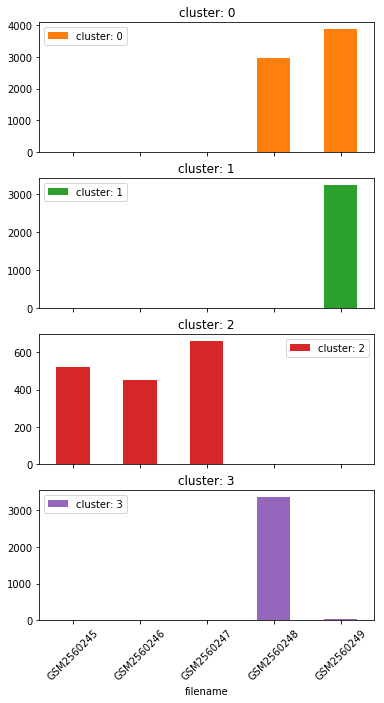

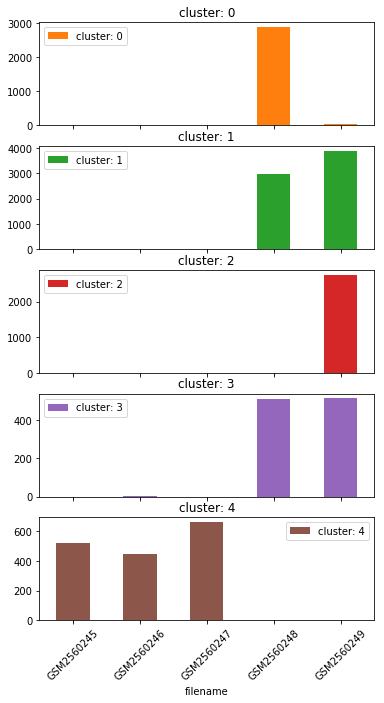

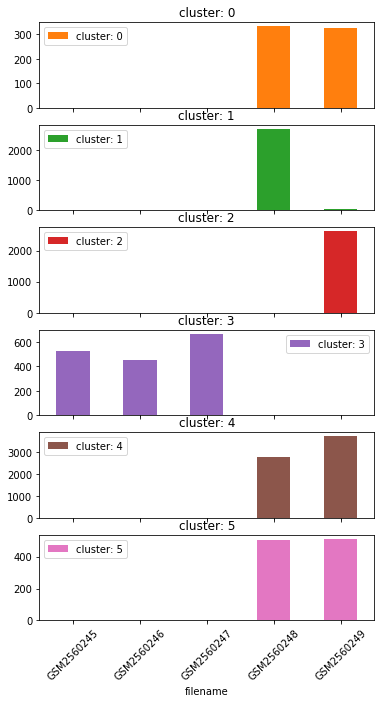

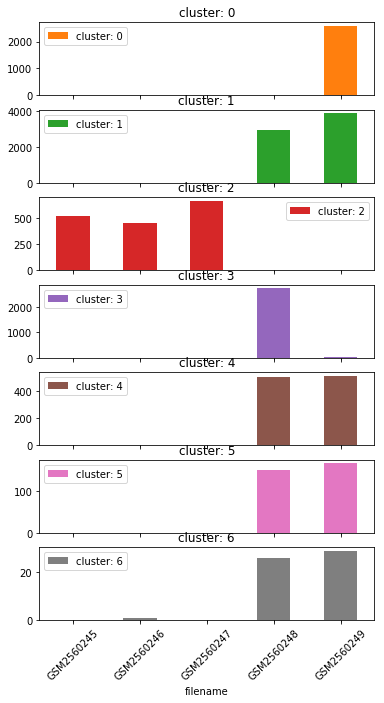

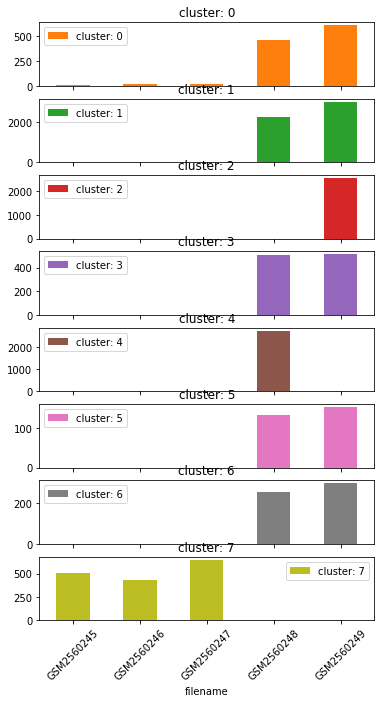

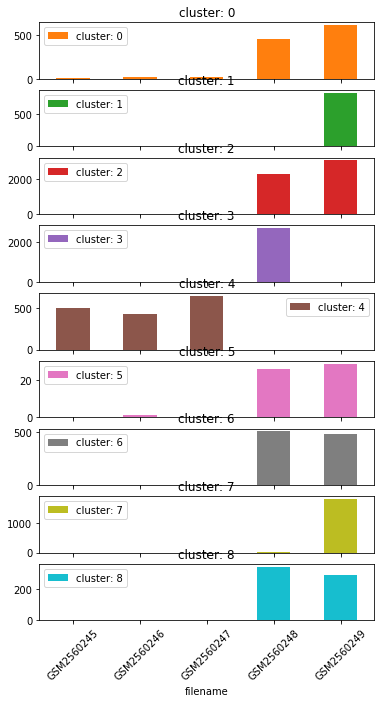

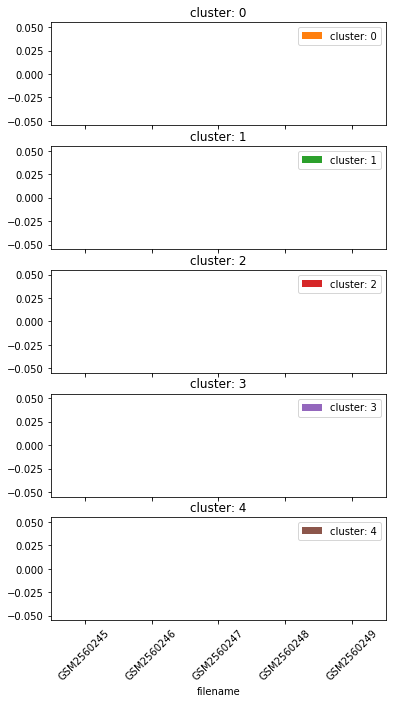

In [68]:
plot_all_file_dists_v2(columns_v2, labels_v2)

In [65]:
os.path.join(top_dir, "v2", "KMEANS", "KMEANS" + "1" + "clusters"+".png")

'suplementary_figures/v2\\KMEANS\\KMEANS1clusters.png'

In [76]:
def plot_all_tsne_v2(columns, labels):
    for column in columns:
        clustering_method = column.split("_")[0]
        tsne_v2['labels'] = labels[column]
        scatter_plot_clusters(tsne_v2)
        plt.savefig(os.path.join(top_dir, "v2", "KMEANS", "KMEANS" + str(column) + "clusters_tsne_plot"+".png"))

TypeError: can only concatenate str (not "int") to str

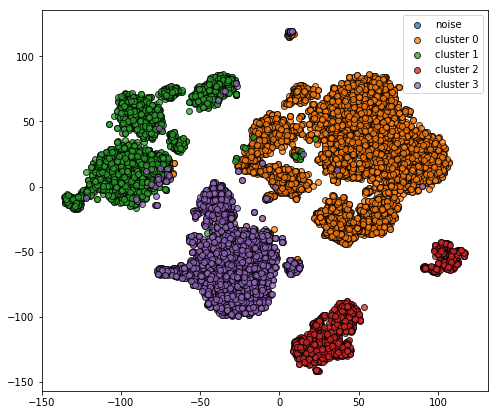

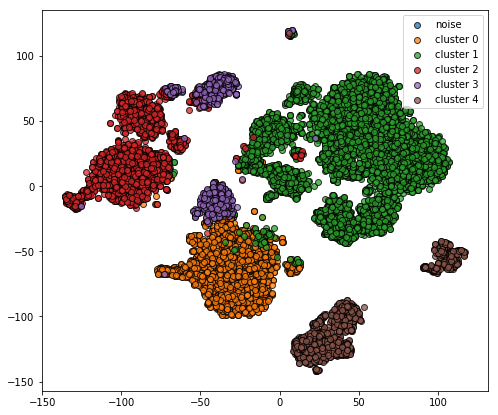

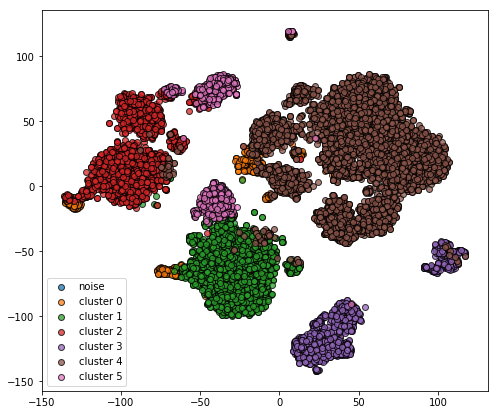

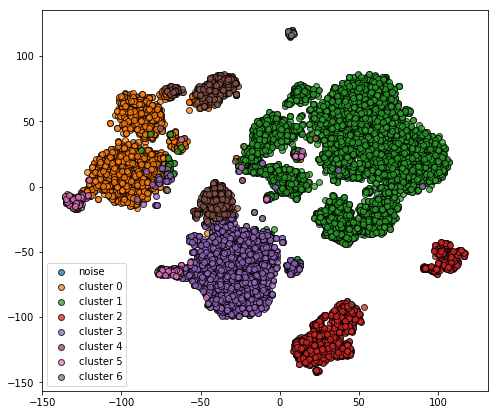

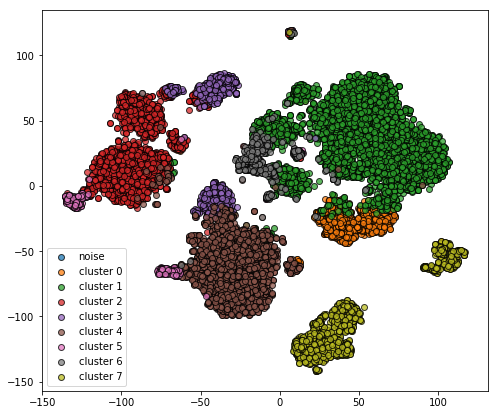

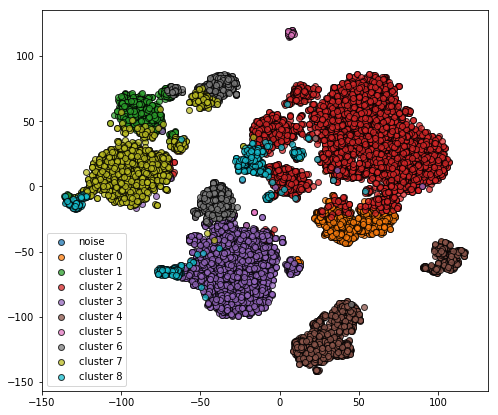

<Figure size 576x504 with 0 Axes>

In [77]:
plot_all_tsne_v2(columns_v2, labels_v2)